In [52]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
data = {
    'id': list(range(1, 13)),
    'weight': [3.2, 4.0, 3.8, 3.5, 4.1, 3.9, 24.5, 26.0, 25.1, 24.7, 25.0, 26.2],
    'height': [25, 28, 27, 26, 30, 29, 58, 60, 59, 57, 60, 61],
    'tail_length': [15, 14, 13, 14, 15, 13, 24, 25, 25, 24, 25, 26],
    'ear_shape': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    'label': ['cat']*6 + ['dog']*6
}

df = pd.DataFrame(data)


In [58]:
X = df[['weight', 'height', 'tail_length', 'ear_shape']]
y = df['label'].map({'cat': 0, 'dog': 1})


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



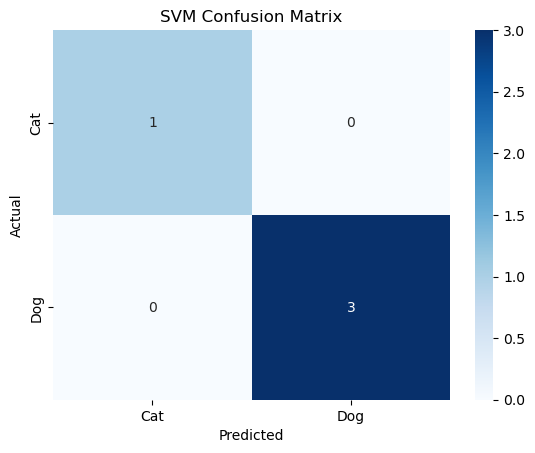

In [64]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



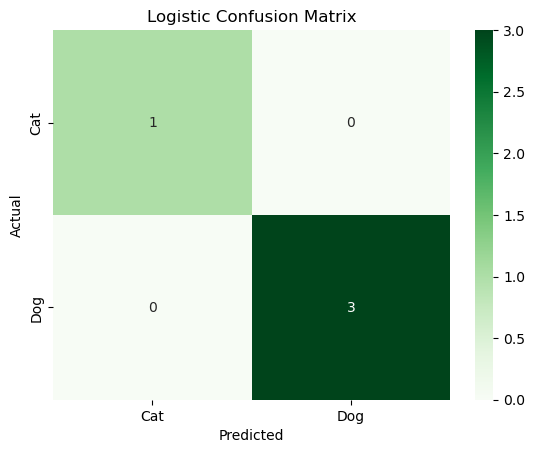

In [68]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [70]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

if accuracy_score(y_test, y_pred_kmeans) < 0.5:
    y_pred_kmeans = 1 - y_pred_kmeans

print("K-Means Accuracy:", accuracy_score(y_test, y_pred_kmeans))


K-Means Accuracy: 1.0


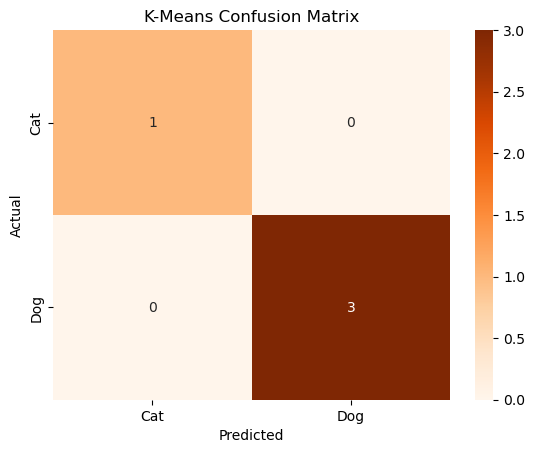

In [72]:
cm = confusion_matrix(y_test, y_pred_kmeans)
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('K-Means Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
